## Knowledge Base Q&A:

Provide direct, dynamic answers from databases, making data access swift and user-friendly.

## GenAI Stack Workflow for Knowledge Base Question & Answer

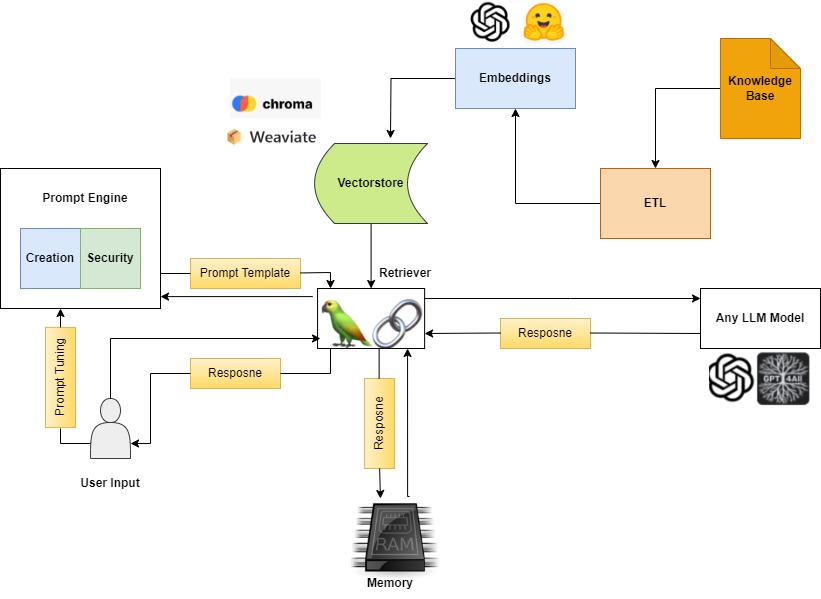

## Installing GenAI Stack version 2

In [ ]:
!pip install git+https://github.com/aiplanethub/genai-stack.git@0.2.0

  Cloning https://github.com/aiplanethub/genai-stack.git (to revision 0.2.0) to /tmp/pip-req-build-hsmd3mo9
  Running command git clone --filter=blob:none --quiet https://github.com/aiplanethub/genai-stack.git /tmp/pip-req-build-hsmd3mo9
  Running command git checkout -b 0.2.0 --track origin/0.2.0
  Switched to a new branch '0.2.0'
  Branch '0.2.0' set up to track remote branch '0.2.0' from 'origin'.
  Resolved https://github.com/aiplanethub/genai-stack.git to commit 4960a901d9326df683cad87a7c41843273e396c9
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


## Componets used for implementation

* **gpt-3.5-turbo** as LLM
* **Chromadb** as Vectorstore
* **sentence-transformers/all-mpnet-base-v2** sentence transformer for text embeddings
* **Langchain** Framework

## Import Required GenAI Stack Components

In [ ]:
from genai_stack.stack.stack import Stack
from genai_stack.etl.langchain import LangchainETL
from genai_stack.embedding.langchain import LangchainEmbedding
from genai_stack.vectordb.chromadb import ChromaDB
from genai_stack.prompt_engine.engine import PromptEngine
from genai_stack.model.gpt3_5 import OpenAIGpt35Model
from genai_stack.retriever import LangChainRetriever
from genai_stack.memory.langchain import ConversationBufferMemory

## Instantiate ETL component by providing configuration according to source data type.

* Here the input source is .pdf file




In [ ]:
etl = LangchainETL.from_kwargs(name="PyPDFLoader", fields={"file_path": "YOUR PDF DOCUMENT PATH"})

## Instantiate the LLM

In [ ]:
llm = OpenAIGpt35Model.from_kwargs(parameters={"openai_api_key": "YOUR OPENAI API KEY"})

## Instantiate Embedding component using open source Huggingface Model

In [ ]:
config = {
    "model_name": "sentence-transformers/all-mpnet-base-v2",
    "model_kwargs": {"device": "cpu"},
    "encode_kwargs": {"normalize_embeddings": False},
}
embedding = LangchainEmbedding.from_kwargs(name="HuggingFaceEmbeddings", fields=config)

## Instantiate the Vectorstore

In [ ]:
chromadb = ChromaDB.from_kwargs()
chromadb


## Instantiate the Retriver

In [ ]:
retriever = LangChainRetriever.from_kwargs()

## Instantiate the Promptengine

* prompt engine constructs the prompt template  for instructing the LLM

In [ ]:
promptengine = PromptEngine.from_kwargs(should_validate=False)

## Instantiate Memory

In [ ]:
memory = ConversationBufferMemory.from_kwargs()

## Setup the GenAI Stack

In [ ]:
stack = Stack(
    etl=etl,
    embedding=embedding,
    vectordb=chromadb,
    model=llm,
    prompt_engine=promptengine,
    retriever=retriever,
    memory=memory
)

## Performing the ETL operations
1. extracting the content
2. transforrmation(creating embeddings),
3. load(storing the knowledge base in  the vectordb)

In [ ]:
etl.run()

## Ask a question

In [ ]:
question = input("Ask a question: ")

Ask a question: What has been mentioned about Mental health literacy?


## Response formulated by the GenAI stack

In [ ]:
response = retriever.retrieve(question)
print(response['output'])

In the context, it is mentioned that there is conceptual confusion regarding mental health literacy among adults and children in the general population. The focus group participants did not find the single continuum model suggested by the WHO helpful. There is also confusion among young people regarding the terms "mental health," "mental illness," and "learning disability." Additionally, it is stated that less than a fifth of young people who need mental health care actually receive any services, and of those who do receive services, less than half obtain services appropriate to their need.


## Helper Function to generate response

In [ ]:
process = "y"
while process == 'y':
  question = input("Ask a question: ")
  print(f"Question : {question}")
  response = retriever.retrieve(question)
  print(f"Response : {response}")
  print("\n\n")
  process =  input("Do you want to continue : y -to continue, n - to exit :")
  print("\n")


Ask a question: What is the stigma related to mental illness ?
Question : What is the stigma related to mental illness ?
Response : {'output': 'The stigma related to mental illness refers to the negative attitudes, beliefs, and stereotypes that society holds towards individuals with mental health conditions. This stigma can lead to discrimination, social exclusion, and the devaluation of individuals with mental illness. It is often based on misconceptions and fear, and can result in individuals being labeled as dangerous, unpredictable, or responsible for their own condition. Stigma can have significant negative impacts on individuals with mental illness, including barriers to seeking help, reduced access to treatment, and decreased quality of life.'}



Do you want to continue : y -to continue, n - to exit :y
Ask a question: What has been mentioned about Mental health literacy?
Question : What has been mentioned about Mental health literacy?
Response : {'output': 'In the context, it i